# 서울시 지역별 5대 범죄

In [1]:
import pandas as pd
import time 
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import numpy as np

In [2]:
crime_Seoul = pd.read_csv('./data/서울시 5대범죄 발생현황.tsv', 
                    sep='\t', header=1, thousands=',')
crime_Seoul.head()

,기간,자치구,발생,검거,발생.1,검거.1,발생.2,검거.2,발생.3,검거.3,발생.4,검거.4,발생.5,검거.5
0,2019,합계,103668,74805,136,128,136,133,6469,6007,42204,21284,54723,47253
1,2019,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
2,2019,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
3,2019,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823
4,2019,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216


In [3]:
del crime_Seoul['기간']

In [4]:
crime_Seoul.drop([0],inplace=True)

In [5]:
crime_Seoul.rename({
    '자치구': '구별',
    '발생.1': '살인발생', '검거.1': '살인검거',
    '발생.2': '강도발생', '검거.2': '강도검거',
    '발생.3': '강간발생', '검거.3': '강간검거',
    '발생.4': '절도발생', '검거.4': '절도검거',
    '발생.5': '폭력발생', '검거.5': '폭력검거'
}, inplace=True, axis=1)
crime_Seoul.head()

,구별,발생,검거,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
1,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
2,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
3,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823
4,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216
5,광진구,4011,2816,4,5,6,5,273,213,1875,1008,1853,1585


In [6]:
crime_Seoul['살인검거율'] = crime_Seoul['살인검거'] / crime_Seoul['살인발생'] * 100
crime_Seoul['강도검거율'] = crime_Seoul['강도검거'] / crime_Seoul['강도발생'] * 100
crime_Seoul['강간검거율'] = crime_Seoul['강간검거'] / crime_Seoul['강간발생'] * 100
crime_Seoul['절도검거율'] = crime_Seoul['절도검거'] / crime_Seoul['절도발생'] * 100
crime_Seoul['폭력검거율'] = crime_Seoul['폭력검거'] / crime_Seoul['폭력발생'] * 100

In [7]:
del crime_Seoul['발생']
del crime_Seoul['검거']
del crime_Seoul['살인검거']
del crime_Seoul['강도검거']
del crime_Seoul['강간검거']
del crime_Seoul['절도검거']
del crime_Seoul['폭력검거']

In [8]:
crime_Seoul.head()

,구별,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
1,종로구,4,7,238,1515,2082,125.000000,114.285714,480.252101,70.561056,90.874159
2,중구,2,6,195,2202,1922,50.000000,83.333333,58.974359,47.683924,84.963580
3,용산구,3,3,272,999,2036,100.000000,133.333333,87.132353,54.454454,89.538310
4,성동구,6,9,133,970,1394,83.333333,111.111111,72.180451,52.680412,87.230990
5,광진구,4,6,273,1875,1853,125.000000,83.333333,78.021978,53.760000,85.536967


In [9]:
con_list = ['살인검거율','강도검거율','강간검거율','절도검거율','폭력검거율']

for column in con_list:
    crime_Seoul.loc[crime_Seoul[column] > 100, column] = 100

In [10]:
crime_Seoul.rename(columns={'살인발생':'살인',
                            '강도발생':'강도',
                            '강간발생':'강간',
                            '절도발생':'절도',
                            '폭력발생':'폭력'},inplace = True)
crime_Seoul.head()

,구별,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
1,종로구,4,7,238,1515,2082,100.000000,100.000000,100.000000,70.561056,90.874159
2,중구,2,6,195,2202,1922,50.000000,83.333333,58.974359,47.683924,84.963580
3,용산구,3,3,272,999,2036,100.000000,100.000000,87.132353,54.454454,89.538310
4,성동구,6,9,133,970,1394,83.333333,100.000000,72.180451,52.680412,87.230990
5,광진구,4,6,273,1875,1853,100.000000,83.333333,78.021978,53.760000,85.536967


In [11]:
crime_Seoul.set_index('구별', inplace=True)

In [12]:
from sklearn import preprocessing

col = ['살인', '강도', '강간', '절도', '폭력']

x = crime_Seoul[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_Seoul_norm = pd.DataFrame(x_scaled,
                                        columns= col,
                                        index = crime_Seoul.index)

col2 = ['살인검거율', '강도검거율', '강간검거율', '절도검거율', '폭력검거율']
crime_Seoul_norm[col2] = crime_Seoul[col2]
crime_Seoul_norm.head()

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,100.000000,100.000000,100.000000,70.561056,90.874159
중구,0.083333,0.357143,0.182292,0.647706,0.286771,50.000000,83.333333,58.974359,47.683924,84.963580
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.000000,100.000000,87.132353,54.454454,89.538310
성동구,0.416667,0.571429,0.074653,0.082569,0.069844,83.333333,100.000000,72.180451,52.680412,87.230990
광진구,0.250000,0.357143,0.317708,0.497706,0.258422,100.000000,83.333333,78.021978,53.760000,85.536967


In [18]:
result_CCTV = pd.read_csv('./data/CCTV_result.csv',encoding='utf8',index_col='구별')

In [19]:
result_CCTV.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156
강동구,1879,82.960078,462275,458058,4217,68798,0.912228,14.882483
강북구,1265,83.068017,313550,309996,3554,62951,1.133472,20.076862
강서구,1617,77.887789,589536,583544,5992,88052,1.016393,14.935814
관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764


In [20]:
crime_Seoul_norm[['인구수','CCTV']] = result_CCTV[['인구수','소계']]
crime_Seoul_norm.head()

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,100.000000,100.000000,100.000000,70.561056,90.874159,159842,1471
중구,0.083333,0.357143,0.182292,0.647706,0.286771,50.000000,83.333333,58.974359,47.683924,84.963580,135321,1544
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.000000,100.000000,87.132353,54.454454,89.538310,244953,2063
성동구,0.416667,0.571429,0.074653,0.082569,0.069844,83.333333,100.000000,72.180451,52.680412,87.230990,302695,2679
광진구,0.250000,0.357143,0.317708,0.497706,0.258422,100.000000,83.333333,78.021978,53.760000,85.536967,361923,1581


In [42]:
col = ['살인', '강도', '강간', '절도', '폭력']
crime_Seoul_norm['범죄'] = np.sum(crime_Seoul_norm[col],axis=1)
crime_Seoul_norm.head()

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,100.000000,100.000000,100.000000,70.561056,90.874159,159842,1471,1.620591,100.000000
중구,0.083333,0.357143,0.182292,0.647706,0.286771,50.000000,83.333333,58.974359,47.683924,84.963580,135321,1544,1.557245,70.422713
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.000000,100.000000,87.132353,54.454454,89.538310,244953,2063,1.054975,93.431343
성동구,0.416667,0.571429,0.074653,0.082569,0.069844,83.333333,100.000000,72.180451,52.680412,87.230990,302695,2679,1.215161,85.694627
광진구,0.250000,0.357143,0.317708,0.497706,0.258422,100.000000,83.333333,78.021978,53.760000,85.536967,361923,1581,1.680980,86.827417


In [43]:
col = ['살인검거율', '강도검거율', '강간검거율', '절도검거율', '폭력검거율']
crime_Seoul_norm['검거'] = np.sum(crime_Seoul_norm[col],axis=1)
crime_Seoul_norm.head()

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,100.000000,100.000000,100.000000,70.561056,90.874159,159842,1471,1.620591,461.435216
중구,0.083333,0.357143,0.182292,0.647706,0.286771,50.000000,83.333333,58.974359,47.683924,84.963580,135321,1544,1.557245,324.955196
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.000000,100.000000,87.132353,54.454454,89.538310,244953,2063,1.054975,431.125118
성동구,0.416667,0.571429,0.074653,0.082569,0.069844,83.333333,100.000000,72.180451,52.680412,87.230990,302695,2679,1.215161,395.425187
광진구,0.250000,0.357143,0.317708,0.497706,0.258422,100.000000,83.333333,78.021978,53.760000,85.536967,361923,1581,1.680980,400.652278


In [23]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

In [24]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

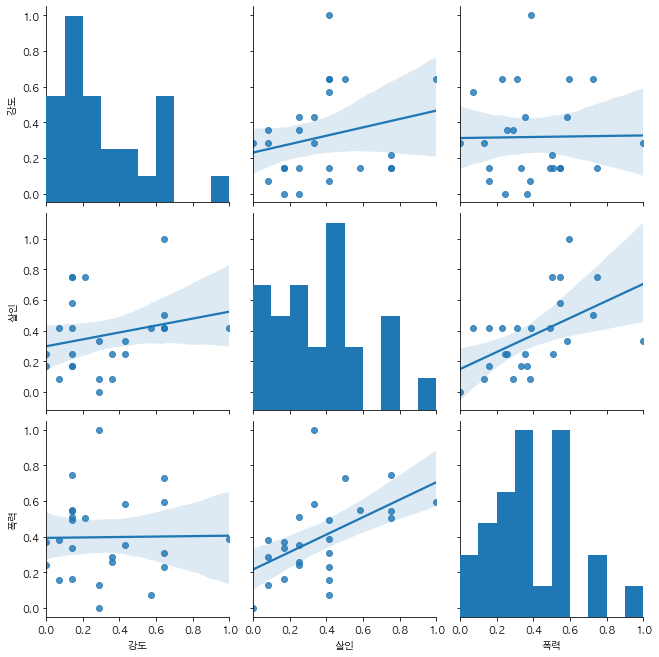

In [25]:
sns.pairplot(crime_Seoul_norm, vars=['강도','살인','폭력'],kind='reg',size=3)
plt.show()

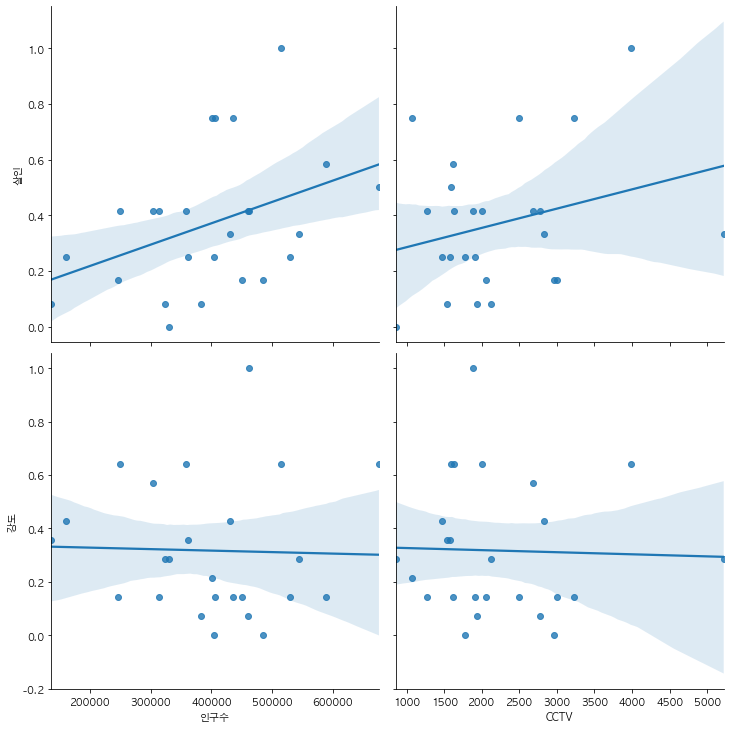

In [26]:
sns.pairplot(crime_Seoul_norm, x_vars=['인구수','CCTV'],y_vars=['살인','강도'],kind='reg',size=5)
plt.show()

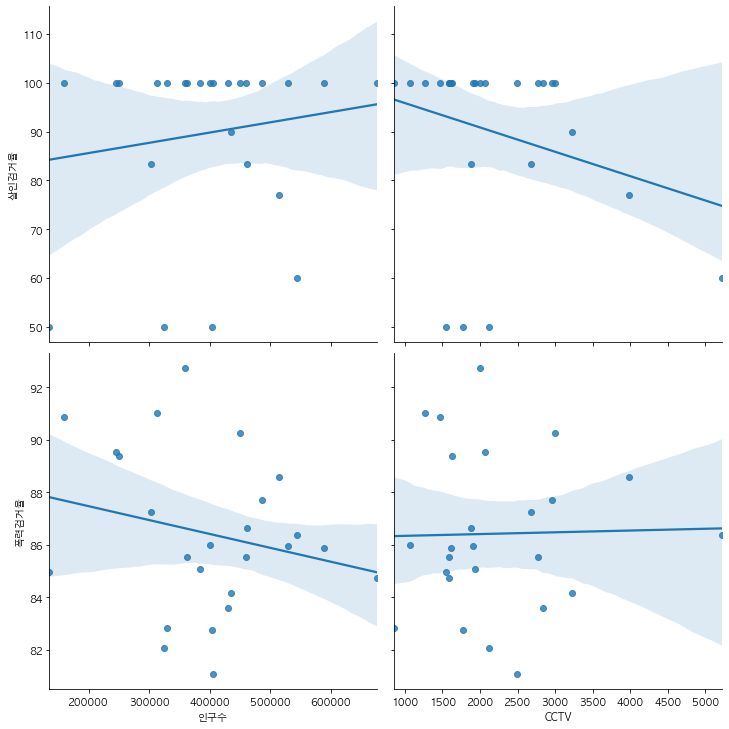

In [27]:
sns.pairplot(crime_Seoul_norm, x_vars=['인구수','CCTV'],y_vars=['살인검거율','폭력검거율'],kind='reg',size=5)
plt.show()

In [40]:
tmp_max = crime_Seoul_norm['검거'].max()
crime_Seoul_norm['검거'] = crime_Seoul_norm['검거'] / tmp_max * 100
crime_Seoul_norm_sort = crime_Seoul_norm.sort_values(by='검거',ascending=False)
crime_Seoul_norm_sort.head()

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,100.0,100.0,100.000000,70.561056,90.874159,159842,1471,1.620591,100.000000
은평구,0.166667,0.000000,0.180556,0.355505,0.366886,100.0,100.0,83.505155,62.428115,87.718470,485842,2962,1.069613,93.978900
성북구,0.166667,0.142857,0.149306,0.133945,0.159819,100.0,100.0,73.863636,67.560074,90.266584,449871,3003,0.752594,93.553825
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.0,100.0,87.132353,54.454454,89.538310,244953,2063,1.054975,93.431343
도봉구,0.000000,0.285714,0.000000,0.000000,0.000000,100.0,100.0,92.222222,49.873418,82.843137,329300,858,0.285714,92.090669


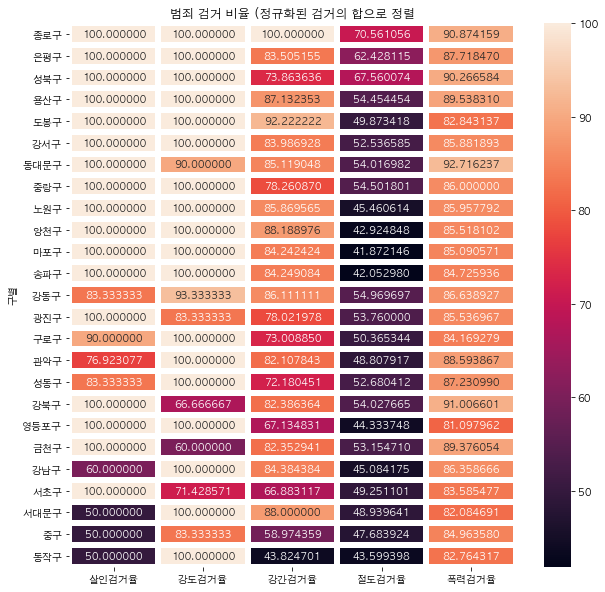

In [44]:
target_col = ['살인검거율', '강도검거율', '강간검거율', '절도검거율', '폭력검거율' ]

crime_Seoul_norm_sort = crime_Seoul_norm.sort_values(by='검거',ascending=False)

plt.figure(figsize = (10,10))
sns.heatmap(crime_Seoul_norm_sort[target_col], annot=True, fmt = 'f', linewidths = 5)
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬')
plt.show()

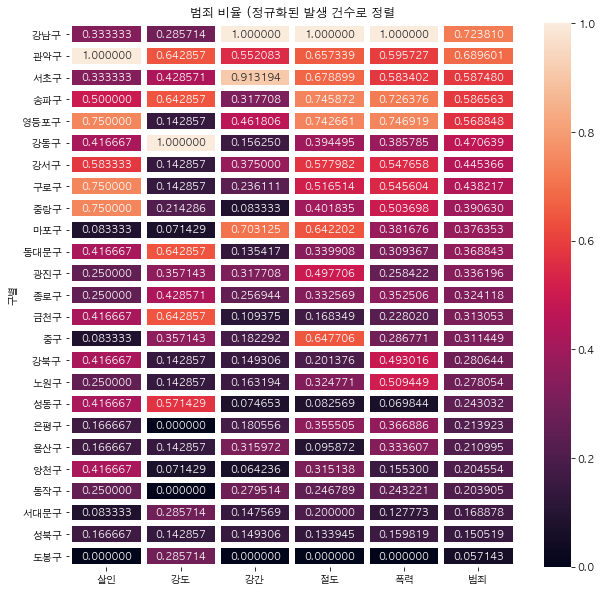

In [45]:
target_col = ['살인', '강도', '강간', '절도', '폭력' ,'범죄']

crime_Seoul_norm['범죄'] = crime_Seoul_norm['범죄'] / 5
crime_Seoul_norm_sort = crime_Seoul_norm.sort_values(by='범죄',ascending=False)

plt.figure(figsize = (10,10))
sns.heatmap(crime_Seoul_norm_sort[target_col], annot=True, fmt = 'f', linewidths = 5)
plt.title('범죄 비율 (정규화된 발생 건수로 정렬')
plt.show()

In [47]:
import folium
import json

In [49]:
geo_path = '../05.Crawling/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf8'))

In [51]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
                data = crime_Seoul_norm['살인'],
                columns = [crime_Seoul_norm.index, crime_Seoul_norm['살인']],
                fill_color = 'PuRd',
                key_on = 'feature.id')
map

In [52]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
                data = crime_Seoul_norm['강간'],
                columns = [crime_Seoul_norm.index, crime_Seoul_norm['강간']],
                fill_color = 'PuRd',
                key_on = 'feature.id')
map

In [56]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
                data = crime_Seoul_norm['범죄'],
                columns = [crime_Seoul_norm.index, crime_Seoul_norm['범죄']],
                fill_color = 'PuRd',
                key_on = 'feature.id')
map

In [58]:
tmp_criminal = crime_Seoul_norm['살인']/crime_Seoul_norm['인구수']*1000000

map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
                data = tmp_criminal,
                columns = [crime_Seoul_norm.index, tmp_criminal],
                fill_color = 'PuRd',
                key_on = 'feature.id')
map

In [60]:
import requests
from urllib.parse import quote

key_fd = open('../06.RestAPI/roadapikey.txt', mode='r')
roadapi_key = key_fd.read(100)
key_fd.close()

In [62]:
police_list = [
    '서울강남경찰서', '서울강동경찰서', '서울강북경찰서', '서울강서경찰서',
    '서울관악경찰서', '서울광진경찰서', '서울구로경찰서', '서울금천경찰서',
    '서울남대문경찰서', '서울노원경찰서', '서울도봉경찰서', '서울동대문경찰서',
    '서울동작경찰서', '서울마포경찰서', '서울방배경찰서', '서울서대문경찰서',
    '서울서부경찰서', '서울서초경찰서', '서울성동경찰서', '서울성북경찰서',
    '서울송파경찰서', '서울수서경찰서', '서울양천경찰서', '서울영등포경찰서',
    '서울용산경찰서', '서울은평경찰서', '서울종로경찰서', '서울종암경찰서',
    '서울중랑경찰서', '서울중부경찰서', '서울혜화경찰서'
]

In [63]:
road_url = 'https://www.juso.go.kr/addrlink/addrLinkApi.do'

road_addr_list = []
for police in police_list:
    url = f'{road_url}?confmKey={roadapi_key}&currentPage=1&countPerPage=10&keyword={quote(police)}&resultType=json'
    results = requests.get(url).json()
    addr_list = results['results']['juso']
    road_addr = addr_list[0]['roadAddr']
    road_addr_list.append(road_addr)

In [64]:
print(road_addr_list)

['서울특별시 강남구 개포로 617 (개포동)', '서울특별시 강동구 고덕로80길 7 (상일동)', '서울특별시 강북구 오패산로 406 (번동)', '서울특별시 강서구 화곡로 308 (화곡동)', '서울특별시 관악구 관악로5길 33 (봉천동)', '서울특별시 광진구 자양로 167 (구의동)', '서울특별시 구로구 가마산로 235 (구로동)', '서울특별시 금천구 시흥대로73길 50 (시흥동)', '서울특별시 중구 서소문로 131-1 (서소문동)', '서울특별시 노원구 노원로 283 (하계동)', '서울특별시 도봉구 노해로 403 (창동)', '서울특별시 동대문구 약령시로21길 15 (청량리동)', '서울특별시 동작구 노량진로 148 (노량진동)', '서울특별시 마포구 마포대로 183 (아현동)', '서울특별시 서초구 방배천로 54 (방배동)', '서울특별시 서대문구 성산로 704 (영천동)', '서울특별시 은평구 진흥로 58 (녹번동)', '서울특별시 서초구 반포대로 179 (서초동)', '서울특별시 성동구 왕십리광장로 9 (행당동)', '서울특별시 성북구 보문로 170 (삼선동5가)', '서울특별시 송파구 위례순환로 369 (장지동)', '서울특별시 강남구 개포로 617 (개포동)', '서울특별시 양천구 목동동로 99 (신정동)', '서울특별시 영등포구 경인로102길 13 (영등포동)', '서울특별시 용산구 원효로89길 24 (원효로1가)', '서울특별시 은평구 연서로 365 (불광동)', '서울특별시 종로구 율곡로 46 (경운동)', '서울특별시 성북구 종암로 45 (종암동)', '서울특별시 중랑구 신내역로3길 40-10 (신내동)', '서울특별시 중구 수표로 27 (저동2가)', '서울특별시 종로구 성균관로 78 (명륜1가)']


In [65]:
df = pd.DataFrame({'name': police_list, 'addr': road_addr_list})
df.head()

,name,addr
0,서울강남경찰서,서울특별시 강남구 개포로 617 (개포동)
1,서울강동경찰서,서울특별시 강동구 고덕로80길 7 (상일동)
2,서울강북경찰서,서울특별시 강북구 오패산로 406 (번동)
3,서울강서경찰서,서울특별시 강서구 화곡로 308 (화곡동)
4,서울관악경찰서,서울특별시 관악구 관악로5길 33 (봉천동)


In [68]:
key_fd = open('../06.RestAPI/kakaomapkey.txt', mode='r')
kmap_key = key_fd.read(100)
key_fd.close()

In [71]:
lat_list, lng_list = [], []
for i in df.index:
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + quote(df.addr[i])
    result = requests.get(url,
            headers={"Authorization": "KakaoAK "+kmap_key}).json()
    lat = float(result['documents'][0]['y'])
    lng = float(result['documents'][0]['x'])
    lat_list.append(lat)
    lng_list.append(lng)

In [72]:
df['lat'] = lat_list
df['lng'] = lng_list

In [73]:
df.head()

,name,addr,lat,lng
0,서울강남경찰서,서울특별시 강남구 개포로 617 (개포동),37.493549,127.077144
1,서울강동경찰서,서울특별시 강동구 고덕로80길 7 (상일동),37.556215,127.165844
2,서울강북경찰서,서울특별시 강북구 오패산로 406 (번동),37.637170,127.027042
3,서울강서경찰서,서울특별시 강서구 화곡로 308 (화곡동),37.551558,126.849656
4,서울관악경찰서,서울특별시 관악구 관악로5길 33 (봉천동),37.474234,126.951870


In [75]:
tmp_criminal = crime_Seoul_norm['살인']/crime_Seoul_norm['인구수']*1000000

map = folium.Map(location=[df.lat.mean(),df.lng.mean()], zoom_start=11,
                tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
                data = tmp_criminal,
                columns = [crime_Seoul_norm.index, tmp_criminal],
                fill_color = 'PuRd',
                key_on = 'feature.id')
for i in df.index:
    folium.Marker(
        location=[df.lat[i]	, df.lng[i]], 
        popup= df['name'][i]
    ).add_to(map)

map